# Preprocessing

## Imports and .env

In [1]:
from openai import OpenAI
import os
import pandas as pd
import json
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

openai_key = os.getenv("OPEN_API_KEY")

## Create Comment Dataframe from JSON

In [162]:
# Laden der Vereine und Spieler aus Ihrer JSON-Datei
with open('player_comments.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Umwandlung in ein DataFrame
rows = []
for entry in data:
    club = entry.get("club", "")
    player = entry.get("player", "")
    comments = entry.get("comments", [])
    
    # Jeder Kommentar als eigene Zeile
    for comment in comments:
        rows.append({"club": club, "player": player, "comment": comment})

# DataFrame erstellen
df = pd.DataFrame(rows)

df

,club,player,comment
0,vfb,Alexander Nübel,Silas fehlt halt enorm. Das hat man gerade geg...
1,vfb,Alexander Nübel,"Mit Nübel im Tor leider nichts zu holen, ist l..."
2,vfb,Alexander Nübel,"Absolut starke Leistung, Respekt! 👏🏽 Leider ge..."
3,vfb,Alexander Nübel,Starke Leistung gegen die beste Mannschaft der...
4,vfb,Alexander Nübel,Fakt ist Nübel hat den Punkt verkackt
...,...,...,...
7211,rclens,Andy Diouf,Andy Diouf is the Magic 💪💯❤️💛
7212,rclens,Andy Diouf,"Je pense que pour la suite, il faut garder le ..."
7213,rclens,Remy Labeau Lascary,Désolé mais @r.labeaulascary frère tu es Nuuuu...
7214,rclens,Remy Labeau Lascary,Bravo Rémi labeau lascary tu nous à fait vibre...


In [139]:
# german
filtered_nuebel = df[df["player"] == "Alexander Nübel"].sample(n=50, random_state=42)
filtered_stenzel = df[df["player"] == "Pascal Stenzel"].sample(n=50, random_state=42)
filtered_can = df[df["player"] == "Emre Can"].sample(n=50, random_state=42)
filtered_dorsch = df[df["player"] == "Niklas Dorsch"].sample(n=25, random_state=42)
filtered_scienca = df[df["player"] == "Leo Scienza"].sample(n=25, random_state=42)

# english
filtered_palmer = df[df["player"] == "Cole Palmer"].sample(n=100, random_state=42)  # 100 zufällige Kommentare
filtered_sancho = df[df["player"] == "Jadon Sancho"].sample(n=100, random_state=42)

# spanish
filtered_barco = df[df["player"] == "Valentin Barco"].sample(n=50, random_state=42)
filtered_navas = df[df["player"] == "Jesus Navas"].sample(n=50, random_state=42)
filtered_aguerd = df[df["player"] == "Nayef Aguerd"].sample(n=50, random_state=42)
filtered_pepe = df[df["player"] == "Nicolas Pepe"].sample(n=50, random_state=42)

# french
filtered_david = df[df["player"] == "Jonathan David"].sample(n=50, random_state=42)
filtered_zhegrova = df[df["player"] == "Edon Zhegrova"].sample(n=45, random_state=42)
filtered_wooh = df[df["player"] == "Christopher Wooh"].sample(n=15, random_state=42)
filtered_blas = df[df["player"] == "Ludovic Blas"].sample(n=30, random_state=42)
filtered_gouiri = df[df["player"] == "Amine Gouiri"].sample(n=10, random_state=42)
filtered_danso = df[df["player"] == "Kevin Danso"].sample(n=10, random_state=42)
filtered_truffert = df[df["player"] == "Adrien Truffert"].sample(n=10, random_state=42)
filtered_chevalier = df[df["player"] == "Lucas Chevalier"].sample(n=15, random_state=42)
filtered_assignon = df[df["player"] == "Lorenz Assignon"].sample(n=7, random_state=42)
filtered_samba = df[df["player"] == "Brice Samba"].sample(n=8, random_state=42)

filtered_df = pd.concat([filtered_nuebel, filtered_stenzel, filtered_can, filtered_dorsch, filtered_scienca, filtered_palmer, filtered_sancho, filtered_barco, filtered_navas,filtered_aguerd, filtered_pepe,filtered_david,filtered_zhegrova,filtered_wooh,filtered_blas,filtered_gouiri,filtered_danso,filtered_truffert,filtered_chevalier,filtered_assignon,filtered_samba], ignore_index=True)
# Spalte "label" hinzufügen, initial leer
filtered_df["label"] = ""


In [140]:
filtered_df.to_csv("labeled_data.csv", index=False)


In [143]:
test_df = pd.read_csv("labeled_data.csv")

In [145]:
test_df = test_df[test_df["player"] == "Alexander Nübel"]

In [146]:
test_df

,club,player,comment,label
0,vfb,Alexander Nübel,Silas fehlt halt enorm. Das hat man gerade geg...,NEGATIVE
1,vfb,Alexander Nübel,"Man kann auch als „nicht Fan“ sagen, das war e...",NEUTRAL
2,vfb,Alexander Nübel,Glückwunsch 🙌Post #Nübel No.1,POSITIVE
3,vfb,Alexander Nübel,Nübel bester Mann😂😂😂,POSITIVE
4,vfb,Alexander Nübel,"Wie letzte Saison: Bei jedem Spiel, was wir ni...",NEGATIVE
5,vfb,Alexander Nübel,Immer weiter Jungs⚪️🔴Und: Nübelnübelnübel bis ...,POSITIVE
6,vfb,Alexander Nübel,Und Nübel patzt zweimal zum Endstand 3:1,NEGATIVE
7,vfb,Alexander Nübel,Dann aber auch Mal spielen lassen wenn nübel w...,NEUTRAL
8,vfb,Alexander Nübel,"Stark gekämpft! Schade, dass Nübel diese Saiso...",NEGATIVE
9,vfb,Alexander Nübel,Wenn nübel gegen real so eine unruhe ausstrahl...,NEGATIVE


## Open labeled data

In [8]:
df = pd.read_csv("../data/labeled/labeled_gpt_xlmRoberta_vader.csv")

# GPT-4o

## Create GPT Connection and predict data

In [ ]:
from openai import OpenAI

client = OpenAI(api_key=openai_key)

def send_message_to_gpt(player, comment):

    json_format = {
        "sentiment_score": 0,
        "sentiment": "NEUTRAL",
        "explanation": "example"
    }

    model_prompt = f"You are a linguistics expert and have been assigned to rate social media comments from soccer fans. In the following you will be given a name of a soccer player and a comment from a social media channel. Please rate it according to sentiment towards the Player. The score should be in a range from -1 to 1, where -1 is negative, 0 is neutral and 1 is positive. Please also consider whether the comment realy refers to the specified player and which part of the comment refers realy to the player. Also note the emojis. please give me a sentiment score (-1 to 1), a sentiment (NEGATIVE, NEUTRAL OR POSITIVE) and an explanation in JSON format exact like this: {json.dumps(json_format)}"

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": model_prompt},
            {
                "role": "user",
                "content": f"Player: {player}, Comment: {comment}"
            }
        ],
        response_format={"type": "json_object"}
    )

    return completion

def analyze_sentiment(player, comment):
    completion = send_message_to_gpt(player=player, comment=comment)
    try:
        content = json.loads(completion.choices[0].message.content)
        return content["sentiment_score"], content["sentiment"], content["explanation"]
    except:
        print(completion.choices[0].message.content)
        return None, None, None



In [166]:
df["gpt_sentiment_score"], df["gpt_label"], df["gpt_explanation"] = zip(*df.apply(lambda row: analyze_sentiment(row["player"], row["comment"]), axis=1))

In [168]:
df.to_csv("labeled_and_gpt.csv", index=False)

## Performance Metrics

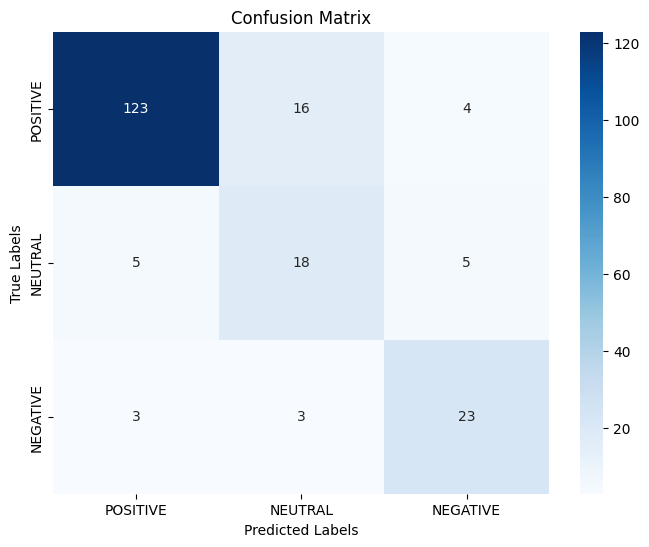

In [10]:
# Confusion Matrix berechnen
cm = confusion_matrix(df["label"], df["gpt_label"], labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

# Confusion Matrix plotten
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["POSITIVE", "NEUTRAL", "NEGATIVE"], 
            yticklabels=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Accuracy und weitere Metriken berechnen
accuracy = accuracy_score(df["label"], df["gpt_label"])
balanced_accuracy = balanced_accuracy_score(df["label"], df["gpt_label"])
classification_metrics = classification_report(df["label"], df["gpt_label"], labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print("\nClassification Report:")
print(classification_metrics)

Accuracy: 0.82
Balanced Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

    POSITIVE       0.94      0.86      0.90       143
     NEUTRAL       0.49      0.64      0.55        28
    NEGATIVE       0.72      0.79      0.75        29

    accuracy                           0.82       200
   macro avg       0.71      0.77      0.74       200
weighted avg       0.84      0.82      0.83       200



# XLM-T

In [10]:
df = pd.read_csv("labeled_and_gpt.csv")

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np

/Users/kn3ule/code_projects/master_WI/Text-Mining-Sentiment-Analysis-for-player-scouting/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [16]:
# Funktion zur Anwendung der Sentiment-Analyse
def analyze_with_xlm_roberta(comment):
    result = sentiment_task(comment)[0]  # Das Ergebnis für den Kommentar
    label = result["label"].upper()  # Sentiment-Label: POSITIVE, NEGATIVE, NEUTRAL
    score = result["score"]  # Wahrscheinlichkeit (Confidence-Score)
    return score, label

In [17]:
# Sentiment-Analyse auf den DataFrame anwenden
df["xlm_roberta_score"], df["xlm_roberta_label"] = zip(*df["comment"].apply(analyze_with_xlm_roberta))

In [24]:
df.to_csv("labeled_and_gpt_and_xlmRoberta.csv", index=False)

## Performance Metrics

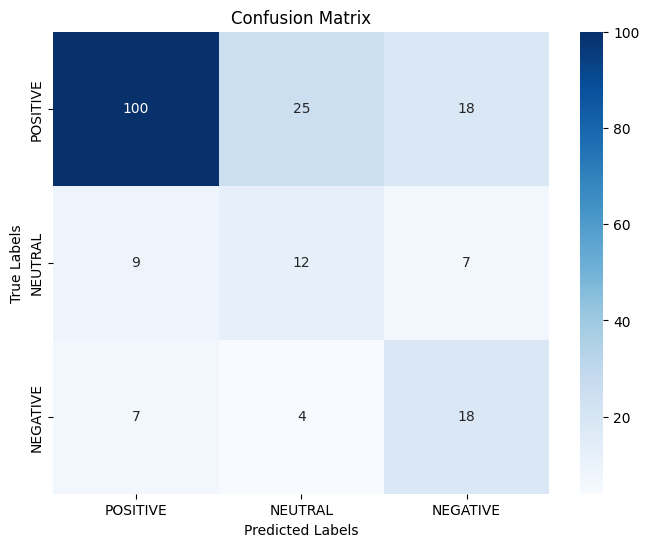

In [8]:
# Confusion Matrix berechnen
cm = confusion_matrix(df["label"], df["xlm_roberta_label"], labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

# Confusion Matrix plotten
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["POSITIVE", "NEUTRAL", "NEGATIVE"], 
            yticklabels=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Accuracy und weitere Metriken berechnen
accuracy = accuracy_score(df["label"], df["xlm_roberta_label"])
balanced_accuracy = balanced_accuracy_score(df["label"], df["xlm_roberta_label"])
classification_metrics = classification_report(df["label"], df["xlm_roberta_label"], labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print("\nClassification Report:")
print(classification_metrics)

Accuracy: 0.65
Balanced Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

    POSITIVE       0.86      0.70      0.77       143
     NEUTRAL       0.29      0.43      0.35        28
    NEGATIVE       0.42      0.62      0.50        29

    accuracy                           0.65       200
   macro avg       0.52      0.58      0.54       200
weighted avg       0.72      0.65      0.67       200



# Vader

In [10]:
from translate import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Translator initialisieren
translator = Translator(to_lang="en")
analyzer = SentimentIntensityAnalyzer()

In [37]:
# Funktion zur Anwendung der Sentiment-Analyse mit VADER
def analyze_with_vader(comment):
    # Übersetzung ins Englische
    translated_text = translator.translate(comment)
    scores = analyzer.polarity_scores(translated_text)
    compound_score = scores["compound"]  # VADER-Compound-Score (-1 bis 1)
    # Klassifizierung basierend auf Compound-Score
    if compound_score >= 0.05:
        sentiment = "POSITIVE"
    elif compound_score <= -0.05:
        sentiment = "NEGATIVE"
    else:
        sentiment = "NEUTRAL"
    return compound_score, sentiment

In [38]:
# Sentiment-Analyse auf den DataFrame anwenden
df["vader_score"], df["vader_label"] = zip(*df["comment"].apply(analyze_with_vader))

## Performance Metrics

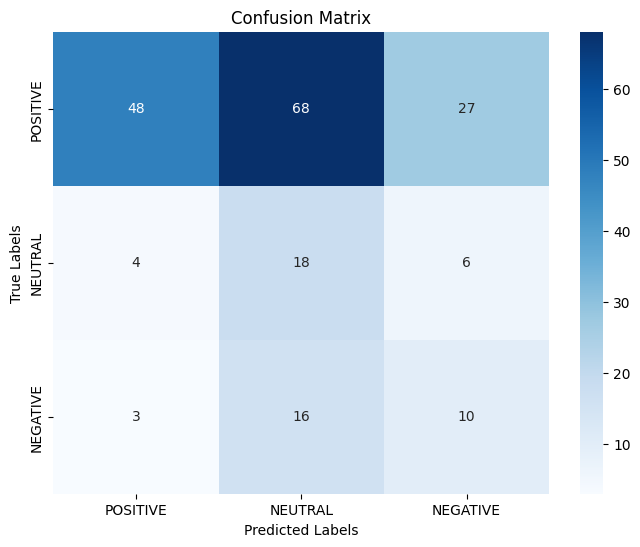

In [9]:
# Confusion Matrix berechnen
cm = confusion_matrix(df["label"], df["vader_label"], labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

# Confusion Matrix plotten
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["POSITIVE", "NEUTRAL", "NEGATIVE"], 
            yticklabels=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# Accuracy und weitere Metriken berechnen
accuracy = accuracy_score(df["label"], df["vader_label"])
balanced_accuracy = balanced_accuracy_score(df["label"], df["vader_label"])
classification_metrics = classification_report(df["label"], df["vader_label"], labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print("\nClassification Report:")
print(classification_metrics)

Accuracy: 0.38
Balanced Accuracy: 0.44

Classification Report:
              precision    recall  f1-score   support

    POSITIVE       0.87      0.34      0.48       143
     NEUTRAL       0.18      0.64      0.28        28
    NEGATIVE       0.23      0.34      0.28        29

    accuracy                           0.38       200
   macro avg       0.43      0.44      0.35       200
weighted avg       0.68      0.38      0.43       200

